In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
df = pd.read_csv('heart.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


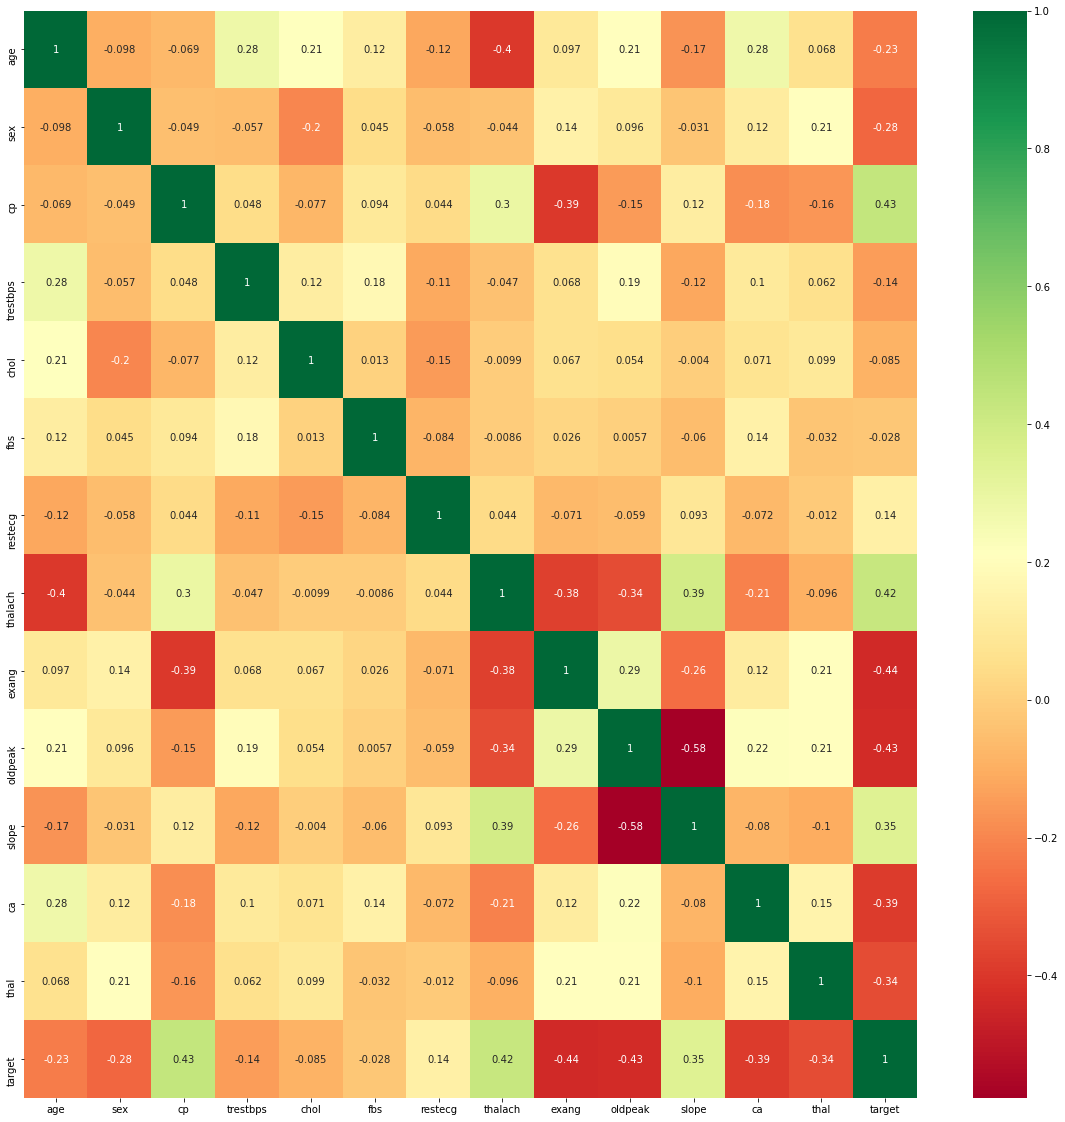

In [17]:
import seaborn as sns
#Update Input:

#For Corelation:

corrm = df.corr()
top_corr_features = corrm.index
plt.figure(figsize = (20,20))

#For Heart Map:

m = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

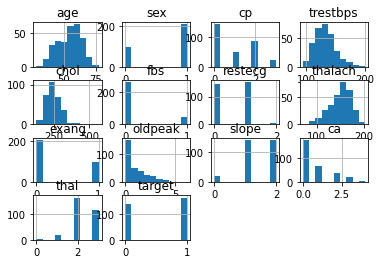

In [18]:
# To Create Histogram
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

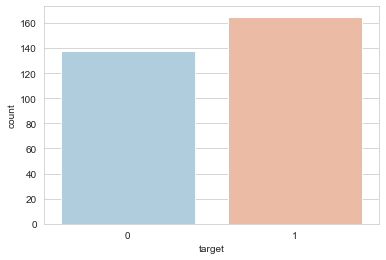

In [20]:
# To Balance Dataset:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = df, palette = 'RdBu_r')


## Data Processing

In [21]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Because Dataset Have Variation And Different Units.

standardScaler = StandardScaler()

col_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_scale] = standardScaler.fit_transform(dataset[col_scale])


In [27]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
# Dependent Feature
y = dataset['target']
# Independent Feature
x = dataset.drop(['target'], axis = 1)

# KNeighborsClassifier

In [31]:
from sklearn.model_selection import cross_val_score # For Cross Validation.

knn_scores = []

for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, x, y, cv = 10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier Scores For Different K values')

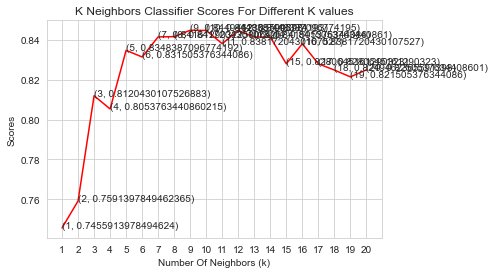

In [36]:
# For Plotting Graph
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number Of Neighbors (k)')
plt.ylabel('Scores')
plt.title("K Neighbors Classifier Scores For Different K values")

In [43]:
# For K = 12
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, x, y, cv = 10)
score.mean()

0.8448387096774195

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [52]:

rfc = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rfc, x, y, cv =10)
score.mean()

0.8279569892473118

# DecisionTreeClassifier

In [60]:
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
prediction = dtc.predict(x_test)

acc = accuracy_score(y_test, prediction)
acc

0.7213114754098361